In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/fake_job_postings.csv',on_bad_lines='skip')
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#Look at the balance of data
df['fraudulent'].value_counts(normalize=True)*100
#

,proportion
fraudulent,
0,95.1566
1,4.8434


In [ ]:
#balance our data


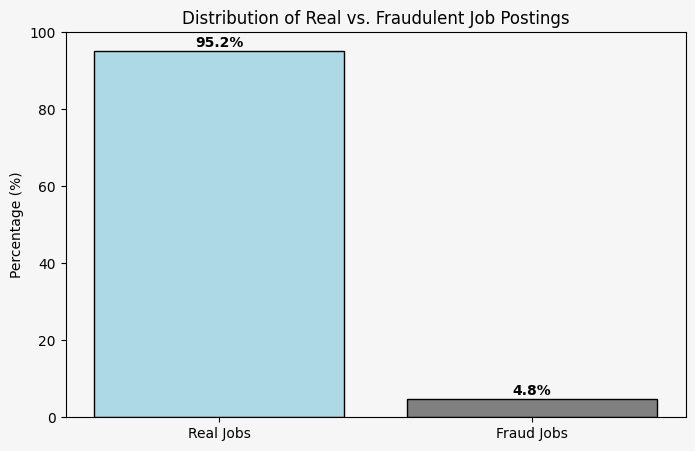

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/fake_job_postings.csv',on_bad_lines='skip')
df.head()


#Look at the balance of data
fraud_distribution = df['fraudulent'].value_counts(normalize=True)*100 # Calculate fraud distribution here

# Define background color
background_color = (246/255, 246/255, 246/255)

# Create the figure with background color
fig, ax = plt.subplots(figsize=(8, 5), facecolor=background_color)
ax.set_facecolor(background_color)

# Create the bar chart with improved styling
bars = ax.bar(
    fraud_distribution.index,
    fraud_distribution.values,
    color=["lightblue", "grey"],  # Define colors for real and fraud jobs
    edgecolor="black",  # Black edges for better visibility
    tick_label=["Real Jobs", "Fraud Jobs"]
)

# Add percentage labels on top of the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}%",
             ha='center', fontsize=10, fontweight='bold', color="black")

# Labels and title
ax.set_ylabel("Percentage (%)")
ax.set_title("Distribution of Real vs. Fraudulent Job Postings", fontsize=12)
ax.set_ylim(0, 100)  # Set y-axis to 100% scale
ax.grid(False)  # Remove grid for a cleaner look


# Show the plot
plt.show()


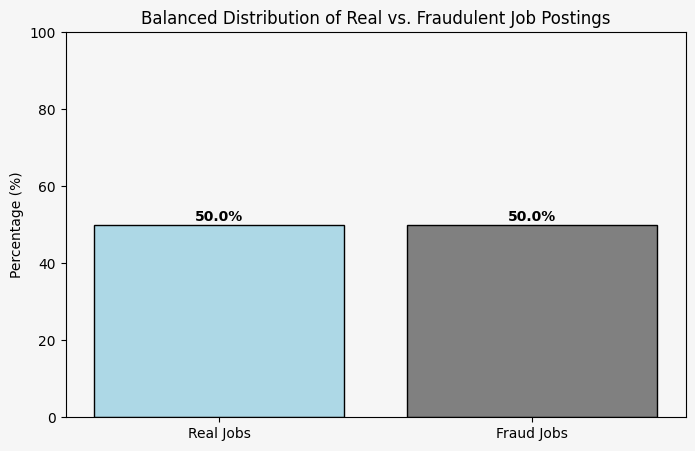

In [ ]:
import seaborn as sns

# Split the dataset into fake and real job postings
fake_jobs = df[df['fraudulent'] == 1]
real_jobs = df[df['fraudulent'] == 0]

# Determine the number of samples to keep for each category
min_count = min(len(fake_jobs), len(real_jobs))

# Randomly sample the same number of fake and real job postings
fake_jobs_sampled = fake_jobs.sample(n=min_count, random_state=42)
real_jobs_sampled = real_jobs.sample(n=min_count, random_state=42)

# Concatenate the sampled data back into a single DataFrame
balanced_df = pd.concat([fake_jobs_sampled, real_jobs_sampled], axis=0)

# Calculate fraud distribution after balancing
fraud_distribution = balanced_df['fraudulent'].value_counts(normalize=True) * 100

# Define background color
background_color = (246/255, 246/255, 246/255)

# Create the figure with background color
fig, ax = plt.subplots(figsize=(8, 5), facecolor=background_color)
ax.set_facecolor(background_color)

# Create the bar chart with improved styling
bars = ax.bar(
    fraud_distribution.index.astype(str),
    fraud_distribution.values,
    color=["lightblue", "grey"],  # Define colors for real and fraud jobs
    edgecolor="black",  # Black edges for better visibility
    tick_label=["Real Jobs", "Fraud Jobs"]
)

# Add percentage labels on top of the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}%",
            ha='center', fontsize=10, fontweight='bold', color="black")

# Labels and title
ax.set_ylabel("Percentage (%)")
ax.set_title("Balanced Distribution of Real vs. Fraudulent Job Postings", fontsize=12)
ax.set_ylim(0, 100)  # Set y-axis to 100% scale
ax.grid(False)  # Remove grid for a cleaner look

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
import pandas as pd

# 1. Remove duplicates
df.drop_duplicates(inplace=True)

# ... (rest of your code)
df.drop_duplicates(inplace=True)

# 2. Handle missing values
categorical_columns = ["department", "employment_type", "required_experience", "required_education", "industry", "function"]
text_columns = ["company_profile", "description", "requirements", "benefits"]
df['required_experience'].fillna('Experience Unavailable', inplace=True)

df[categorical_columns] = df[categorical_columns].fillna("Unspecified")
df[text_columns] = df[text_columns].fillna("")
# Check if 'salary_range' column exists before filling missing values
if 'salary_range' in df.columns:
    df["salary_range"] = df["salary_range"].fillna("0-0")  # Default salary range if missing
else:
    print("Warning: 'salary_range' column not found. Skipping imputation.")



# 5. Convert binary columns to readable format
df["telecommuting"] = df["telecommuting"].map({1: "Yes", 0: "No"})
df["has_company_logo"] = df["has_company_logo"].map({1: "Yes", 0: "No"})
df["has_questions"] = df["has_questions"].map({1: "Yes", 0: "No"})
df["fraudulent"] = df["fraudulent"].map({1: "Fraudulent", 0: "Real"})

# 6. Drop unnecessary columns
# Check if 'salary_range' column exists before dropping
if 'salary_range' in df.columns:
    df.drop(columns=["salary_range"], inplace=True)
else:
    print("Warning: 'salary_range' column not found. Skipping drop.")

#7 job description

df['job_desc_length'] = df['description'].str.len()



# Display first few rows
df.head(10)

<ipython-input-8-6fcb1595c787>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['required_experience'].fillna('Experience Unavailable', inplace=True)


,job_id,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,job_desc_length
0,1,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,NaN,NaN,NaN,Other,Internship,Unspecified,Unspecified,Marketing,Real,905
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,NaN,NaN,NaN,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,Real,2077
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unspecified,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,NaN,NaN,NaN,Unspecified,Experience Unavailable,Unspecified,Unspecified,Unspecified,Real,355
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,Real,2600
4,5,Bill Review Manager,"US, FL, Fort Worth",Unspecified,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,Real,1520
5,6,Accounting Clerk,"US, MD,",Unspecified,,Job OverviewApex is an environmental consultin...,,,NaN,NaN,NaN,Unspecified,Experience Unavailable,Unspecified,Unspecified,Unspecified,Real,3418
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,NaN,NaN,NaN,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,Real,433
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Unspecified,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,NaN,NaN,NaN,Unspecified,Experience Unavailable,Unspecified,Unspecified,Unspecified,Real,2488
8,9,HP BSM SME,"US, FL, Pensacola",Unspecified,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,,NaN,NaN,NaN,Full-time,Associate,Unspecified,Information Technology and Services,Unspecified,Real,75
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",Unspecified,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,,NaN,NaN,NaN,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,Real,1219


In [ ]:
top_10_real_industries_percentage = df[df['fraudulent'] == 'Real']['industry'].value_counts(normalize=True).head(5) * 100
top_10_real_industries_percentage

,proportion
industry,
Unspecified,27.156439
Information Technology and Services,10.014405
Computer Software,8.101412
Internet,6.246039
Education Management,4.742149


In [ ]:
top_10_real_industries_percentage = df[df['fraudulent'] == 'Fraudulent']['industry'].value_counts(normalize=True).head(5) * 100
top_10_real_industries_percentage

,proportion
industry,
Unspecified,34.760705
Oil & Energy,9.487825
Accounting,7.304786
Hospital & Health Care,6.045340
Marketing and Advertising,4.869857


In [ ]:
# Check class distribution
class_distribution = df["fraudulent"].value_counts(normalize=True) * 100

print(class_distribution)

fraudulent
Real          93.57813
Fraudulent     6.42187
Name: proportion, dtype: float64


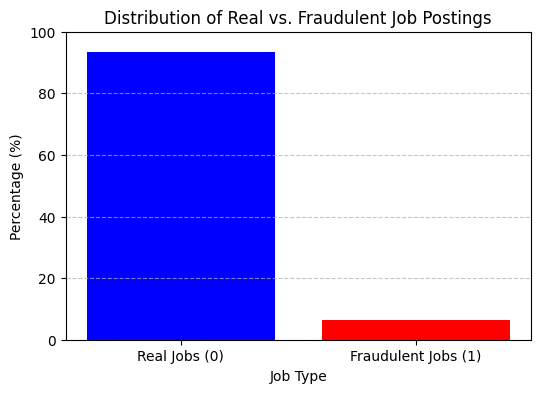

In [ ]:
import matplotlib.pyplot as plt
# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Real Jobs (0)', 'Fraudulent Jobs (1)'])
plt.xlabel("Job Type")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Real vs. Fraudulent Job Postings")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [ ]:
#Find percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


job_id                 0.0
title                  0.0
department             0.0
company_profile        0.0
description            0.0
requirements           0.0
benefits               0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
min_salary             0.0
max_salary             0.0
country                0.0
state                  0.0
city                   0.0
job_desc_length        0.0
dtype: float64


The first thing we need to do is separate country, state and city
For the NAN values we fill them as unspecified


This is the experience level based on real job data


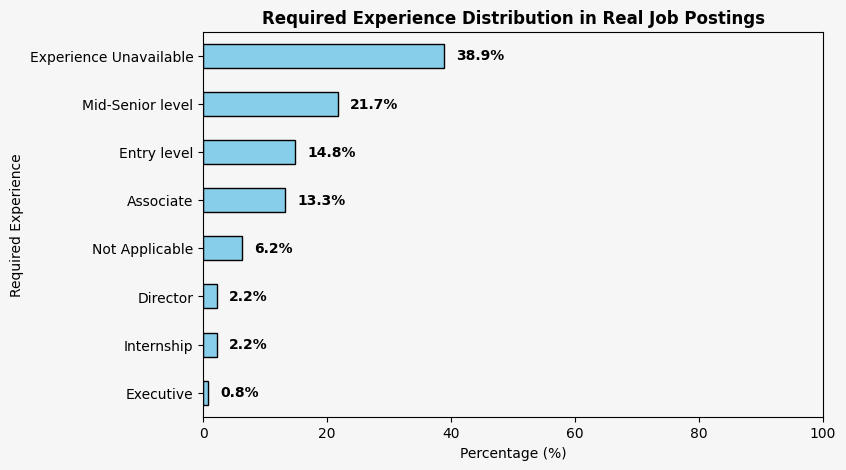

In [ ]:
# Create figure with background matching the slides
real_experience_distribution = df[df['fraudulent'] == 'Real']['required_experience'].value_counts(normalize=True) * 100

background_color = (246/255, 246/255, 246/255) # Define background_color here
plt.figure(figsize=(8, 5), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot horizontal bar chart
real_experience_distribution.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("Required Experience Distribution in Real Job Postings", fontsize=12, fontweight='bold', color="black")
plt.xlabel("Percentage (%)", fontsize=10, color="black")
plt.ylabel("Required Experience", fontsize=10, color="black")
plt.xlim(0, 100)

# Remove gridlines
ax.grid(False)

# Add annotations
for index, value in enumerate(real_experience_distribution.sort_values()):
    plt.text(value + 2, index, f"{value:.1f}%", va='center', fontsize=10, fontweight='bold', color="black")

# Show the plot
plt.show()


This is the experience level based on fraud data

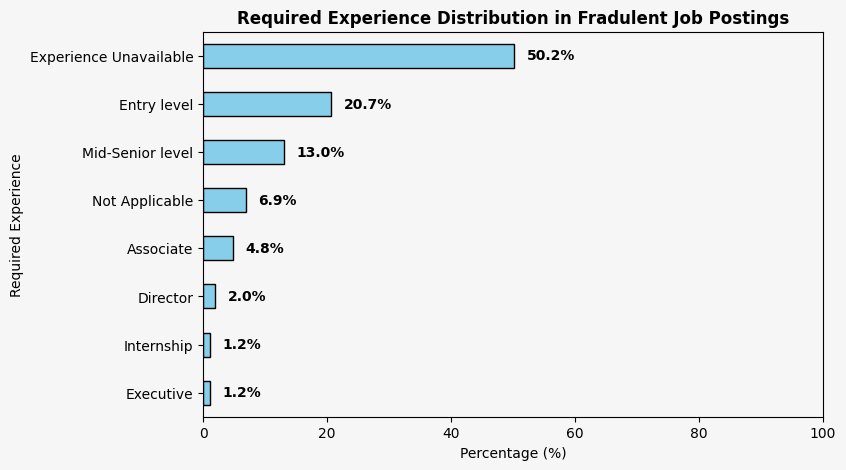

In [ ]:
# Recalculate the experience distribution for fraudulent job postings
fraud_experience_distribution = df[df['fraudulent'] == 'Fraudulent']['required_experience'].value_counts(normalize=True) * 100


background_color = (246/255, 246/255, 246/255)


plt.figure(figsize=(8, 5), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

fraud_experience_distribution.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Remove gridlines
ax.grid(False)

# Add annotations
for index, value in enumerate(fraud_experience_distribution.sort_values()):
    plt.text(value + 2, index, f"{value:.1f}%", va='center', fontsize=10, fontweight='bold', color="black")

# Add title and labels
plt.title("Required Experience Distribution in Fradulent Job Postings", fontsize=12, fontweight='bold')
plt.xlabel("Percentage (%)", fontsize=10)
plt.ylabel("Required Experience", fontsize=10)
plt.xlim(0, 100)


# Show the plot
plt.show()



Make A Graph for Education for Real vs Fradulent


In [ ]:
print(df[df['fraudulent'] == 'Real']['required_education'].value_counts())

required_education
Unspecified                          8990
Bachelor's Degree                    5045
High School or equivalent            1910
Master's Degree                       385
Associate Degree                      268
Certification                         151
Some College Coursework Completed      99
Professional                           70
Vocational                             49
Doctorate                              25
Vocational - HS Diploma                 9
Some High School Coursework             7
Vocational - Degree                     6
Name: count, dtype: int64


In [ ]:
print(df[df['fraudulent'] == 'Fraudulent']['required_education'].value_counts())

required_education
Unspecified                          512
High School or equivalent            170
Bachelor's Degree                    100
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: count, dtype: int64


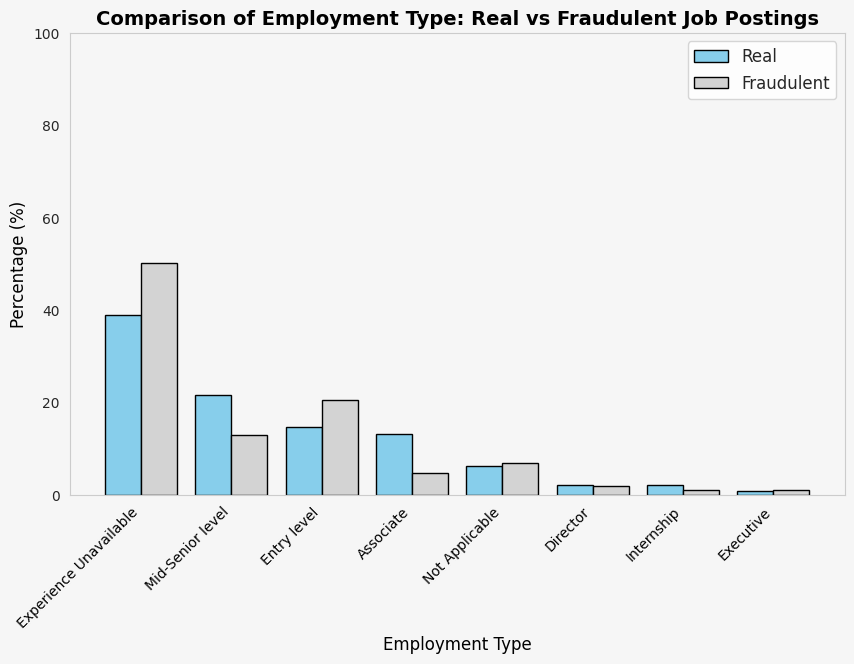

In [ ]:
# Sort employment type distributions from greatest to least
sorted_indices = real_experience_distribution.sort_values(ascending=False).index

# Reorder both distributions based on the sorted real employment distribution
real_experience_distribution = real_experience_distribution[sorted_indices]
fraud_experience_distribution = fraud_experience_distribution[sorted_indices]

# Update employment types order
employment_types_sorted = [str(et) for et in sorted_indices]

# Define bar width
bar_width = 0.4
x = np.arange(len(employment_types_sorted))

# Set seaborn style and background
sns.set_style('whitegrid')

# Create figure with background matching the slides
plt.figure(figsize=(10, 6), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot bars
plt.bar(x - bar_width / 2, real_experience_distribution, bar_width, label="Real", color='skyblue', edgecolor='black')
plt.bar(x + bar_width / 2, fraud_experience_distribution, bar_width, label="Fraudulent", color='lightgrey', edgecolor='black')

# Add title and labels
plt.title("Comparison of Employment Type: Real vs Fraudulent Job Postings", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Employment Type", fontsize=12, color="black")
plt.ylabel("Percentage (%)", fontsize=12, color="black")
plt.xticks(x, employment_types_sorted, rotation=45, ha='right', fontsize=10, color="black")
plt.ylim(0, 100)  # Set y-axis limits

ax.grid(False)

# Create a legend
plt.legend(fontsize=12, loc='upper right')
# Real employment is light skyblue and fraud is grey









# Show the plot
plt.show()


In [ ]:
#This is for the real
print(df[df['fraudulent'] == 'Real']['employment_type'].value_counts(normalize=True) * 100)


employment_type
Full-time      65.416716
Unspecified    18.984366
Contract        8.698719
Part-time       4.249442
Temporary       1.404726
Other           1.246033
Name: proportion, dtype: float64


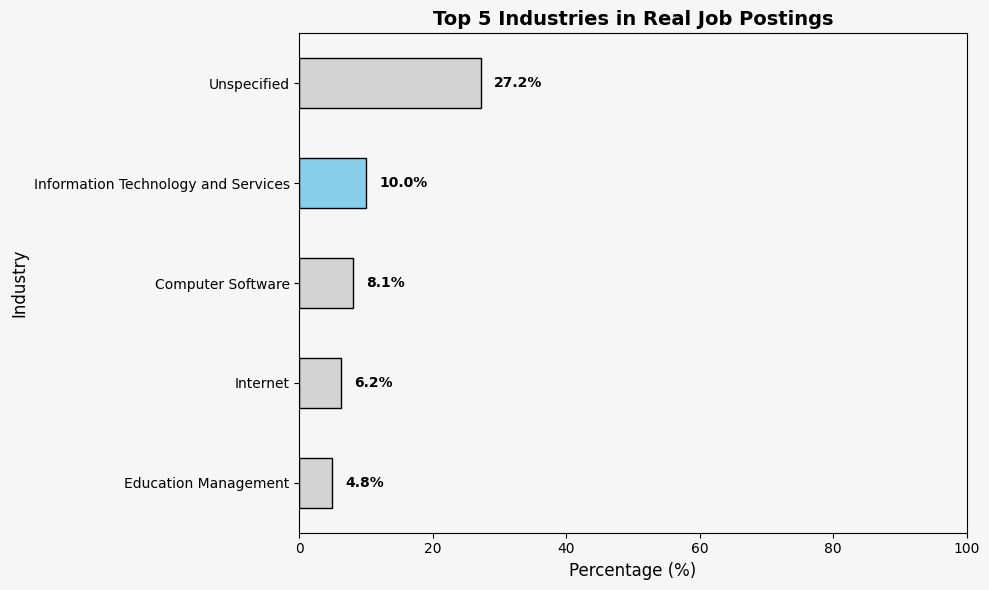

In [ ]:
# Look at the top 10 industries for Real job postings and store the result
top_10_real_industries_percentage = df[df['fraudulent'] == 'Real']['industry'].value_counts(normalize=True).head(5) * 100

# Sort values to ensure the highest percentage is correctly colored
sorted_industries = top_10_real_industries_percentage.sort_values()

# Assign colors: highest percentage in skyblue, others in lightgrey
colors = ['lightgrey'] * (len(sorted_industries) - 2) + ['skyblue']

# Create figure with background matching the slides
plt.figure(figsize=(10, 6), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot horizontal bar chart with custom colors
sorted_industries.plot(kind='barh', color=colors, edgecolor='black')

# Add title and labels
plt.title("Top 5 Industries in Real Job Postings", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Percentage (%)", fontsize=12, color="black")
plt.ylabel("Industry", fontsize=12, color="black")
plt.xlim(0, 100)  # Set x-axis to 100%

ax.grid(False)

# Add annotations
for index, value in enumerate(sorted_industries.sort_values()):
    plt.text(value + 2, index, f"{value:.1f}%", va='center', fontsize=10, fontweight='bold', color="black")







# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

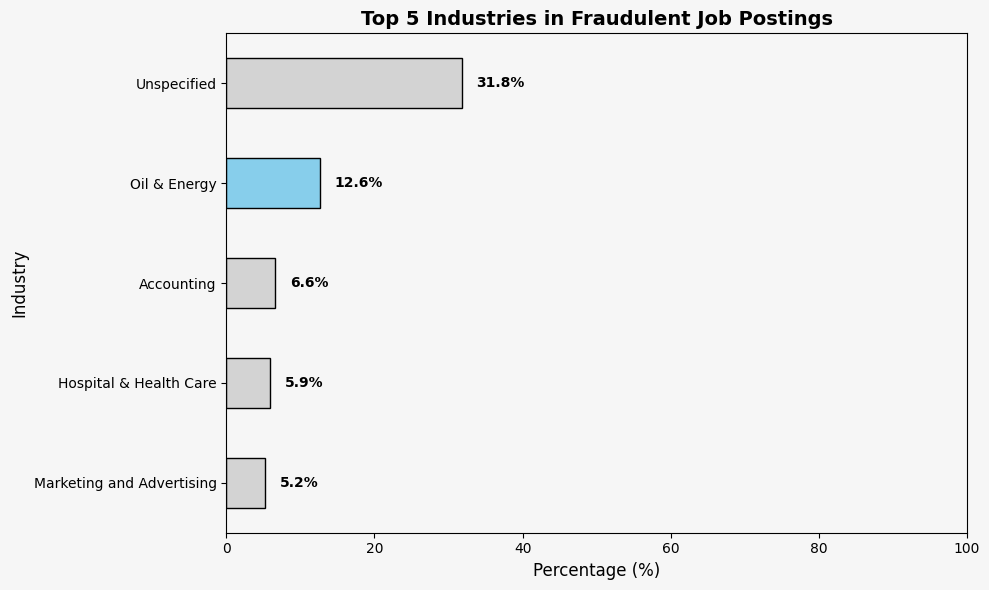

In [ ]:

top_10_real_industries_percentage = df[df['fraudulent'] == 'Fraudulent']['industry'].value_counts(normalize=True).head(5) * 100

# Sort values to ensure the highest percentage is correctly colored
sorted_industries = top_10_real_industries_percentage.sort_values()

# Assign colors: highest percentage in skyblue, others in lightgrey
colors = ['lightgrey'] * (len(sorted_industries) - 2) + ['skyblue']

# Create figure with background matching the slides
plt.figure(figsize=(10, 6), facecolor=background_color)
ax = plt.gca()
ax.set_facecolor(background_color)

# Plot horizontal bar chart with custom colors
sorted_industries.plot(kind='barh', color=colors, edgecolor='black')

ax.grid(False)

# Add annotations
for index, value in enumerate(sorted_industries.sort_values()):
    plt.text(value + 2, index, f"{value:.1f}%", va='center', fontsize=10, fontweight='bold', color="black")

# Add title and labels
plt.title("Top 5 Industries in Fraudulent Job Postings", fontsize=14, fontweight='bold', color="black")
plt.xlabel("Percentage (%)", fontsize=12, color="black")
plt.ylabel("Industry", fontsize=12, color="black")
plt.xlim(0, 100)  # Set x-axis to 100%









# Adjust layout for clarity
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#Company Logo
print(df[df['fraudulent'] == 'Real']['has_company_logo'].value_counts(normalize=True)*100)

has_company_logo
Yes    81.914894
No     18.085106
Name: proportion, dtype: float64


In [ ]:
print(df[df['fraudulent'] == 'Fraudulent']['has_company_logo'].value_counts(normalize=True)*100)

has_company_logo
No     67.321016
Yes    32.678984
Name: proportion, dtype: float64


Machine Learning part!

In [ ]:
#Split the dataset into fake and real job postings
fake_jobs = job_desc_df[job_desc_df['fraudulent'] == 1]
real_jobs = job_desc_df[job_desc_df['fraudulent'] == 0]

#Determine the number of samples to keep for each category
min_count = min(len(fake_jobs), len(real_jobs))

#Randomly sample the same number of fake and real job postings
fake_jobs_sampled = fake_jobs.sample(n=min_count, random_state=42)
real_jobs_sampled = real_jobs.sample(n=min_count, random_state=42)

#Concatenate the sampled data back into a single DataFrame
balanced_df = pd.concat([fake_jobs_sampled, real_jobs_sampled], axis=0)

In [ ]:
balanced_df.shape

(0, 20)

So we have categorical data. So we can use that as our output



```
# This is formatted as code
```

We must use the F1 Metric as a score to see accuracy. The reason for this is because we dont want Real jobs to be predicted as fraud jobs and vice versa

Input Columns considered to check  are : Telecommuting , Has Company Logo , Has Questions , Employment Type , Required Experience , Required Education , Industry , Function , Title , Location , Department.

Output Columns: ''fradulent'' dependent on the column

We realized that the actual job descriptions, company profiles, and requirements contain important clues.
So, instead of just using numerical data, we can add text-based features.


Count Vectorizer (turns words into numbers based on frequency)